<img src="https://storage.googleapis.com/ultralytics/logo/logoname1000.png" width="150">

This notebook contains software developed by Ultralytics LLC, and **is freely available for redistribution under the GPL-3.0 license**. For more information please visit https://github.com/ultralytics/yolov3 and https://www.ultralytics.com.


**Further enhancements and processing of this data was made for The Deep learning seminar WS19/20**


---



The topic of this notebook: **Object detecion with YOLO**

Yolo is an abbreviation which stands for **You only Look Once**

The Dataset which was used containt GDPR relevant Data. If you want to reproduce the results and train the model by yourself i kindly ask you to request access from Prof. Dr. Dorer.

Note: The convertion of the label json file into the yolo label format was done with an seperate script(preproccessing). you can find the relevant coding under "extras".

The Zip file which you will receive contains beside the labeled Data, config files in the folder cfg and information about the class(es) to be trained in the folder data. Further instructions on where to extract the data and how to start the training/prediction you can find in the following text fields above each coding section.


---



The following code imports pytorch:


In [1]:
import torch
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.3.1 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


Clone the ultralisk YOLOv3 repository:

In [3]:
!git clone https://github.com/aquila357/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 7674, done.
remote: Total 7674 (delta 0), reused 0 (delta 0), pack-reused 7674
Receiving objects: 100% (7674/7674), 6.59 MiB | 24.73 MiB/s, done.
Resolving deltas: 100% (5295/5295), done.


**Retrieve TACO(Team Autonomous Car Offenburg) dataset for further processing:**
1. Insert the TACO dataset zip on the same level like the yolov3 folder
2. Run the following command to unzip the data 

Note: the folder structure kept same like for the training of the coco dataset

In [4]:
!unzip -q TACO_car.zip
%cd yolov3

/content/yolov3


Run `train.py` to start the training:

In [6]:
!python3 train.py --data ../coco/data/TACO_car.data --epochs 390 --weights '' --batch-size 100 --cfg cfg/yolov3-tiny-1cls.cfg #Start training
#!python3 train.py --data ../coco/data/TACO_car.data --epochs 390 --batch-size 100 --cfg cfg/yolov3-tiny-1cls.cfg --resume #To resume the training after disconnects based on the last epoch

Namespace(accumulate=4, adam=False, arc='default', batch_size=100, bucket='', cache_images=False, cfg='cfg/yolov3-tiny-1cls.cfg', data='../coco/data/TACO_car.data', device='', epochs=390, evolve=False, img_size=416, img_weights=False, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=False, transfer=False, var=None, weights='')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Caching labels (2631 found, 0 missing, 0 empty, 0 duplicate, for 2631 images): 100% 2631/2631 [00:00<00:00, 11479.00it/s]
Reading image shapes: 100% 328/328 [00:00<00:00, 8075.58it/s]
Caching labels (328 found, 0 missing, 0 empty, 0 duplicate, for 328 images): 100% 328/328 [00:00<00:00, 12007.57it/s]
Model Summary: 37 layers, 8.66988e+06 parameters, 8.66988e+06 gradients
Using 2 dataloader workers
Starting training for 390 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
     0/389     11.4G      7.14

Plot the results of the training for further analysis:

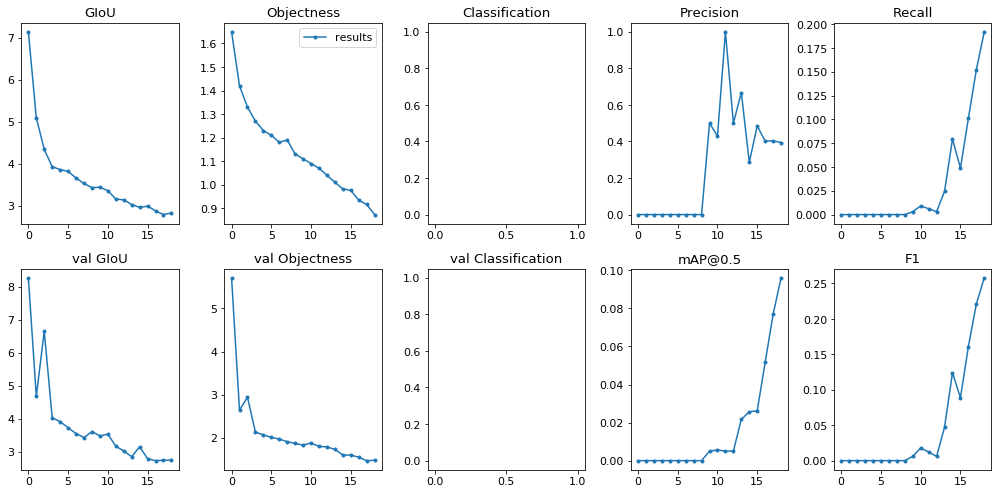

In [7]:
from utils import utils; utils.plot_results()

Apply The Trained model to an test image to receive an prediction:

The default model TACO_car_350.pt was trained with 350epochs and was used as basis for the presentation.

Note: to use ur self-trained modell replace the value of weights with: weights/last.pt

In [8]:
!python3 detect.py --weights ../coco/weights/TACO_car_350.pt --names ../coco/data/TACO_car.names --cfg cfg/yolov3-tiny-1cls.cfg --source ../coco/image_valid

Namespace(cfg='cfg/yolov3-tiny-1cls.cfg', conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, names='../coco/data/TACO_car.names', nms_thres=0.5, output='output', source='../coco/image_valid', view_img=False, weights='../coco/weights/TACO_car_350.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

image 1/6 ../coco/image_valid/aadc1.jpg: 288x416 2 cars, Done. (0.014s)
image 2/6 ../coco/image_valid/aadc2.jpg: 288x416 1 cars, Done. (0.007s)
image 3/6 ../coco/image_valid/aadc3.jpg: 160x416 2 cars, Done. (0.007s)
image 4/6 ../coco/image_valid/car1.jpg: 128x416 1 cars, Done. (0.007s)
image 5/6 ../coco/image_valid/car2.jpg: 128x416 1 cars, Done. (0.006s)
image 6/6 ../coco/image_valid/car3.jpg: 128x416 1 cars, Done. (0.005s)
Results saved to /content/yolov3/output
Done. (0.244s)


**Show detected images:**

To view the images where yolo was applied you have to replace the Filename with the filename string afterwards. 

The predicted images can be found above.

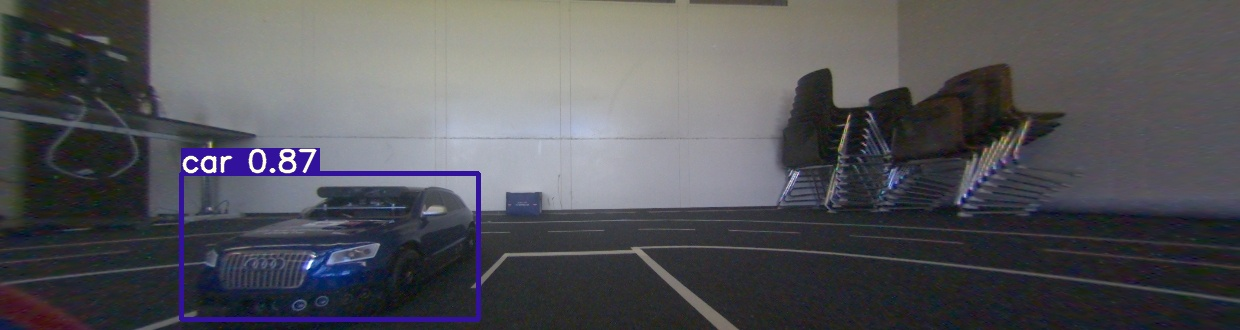

In [11]:
Image(filename='output/car2.jpg', width=1200)
#Image(filename='output/aadc1.jpg', width=1200)